# General Description:

For CDD

Plotting choice as a function of delay_amount, subdivded by delay_wait_time and immediate_amount

Importing libraries and mounting Google Drive

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os,sys


In [44]:
# global parameters
WAIT_DICT = {'now':0,'in 1 day': 1/30.0,'in 1 week':0.25,'in 1 month': 1, 'in 3 months':3, 'in 1 year': 12, 'in 3 months': 3, 'in 5 years':60}

Defining count_tuples() function to return the unique items and their frequencies 

In [45]:
def resync_df(df):
    print('Presync')
    for c in list(df):
        if ('amount' in c) or ('delay' in c):
            if c == 'SS amount':
                continue
            tabulate_col(df,fn='/tmp',col=c,save=False,verbose=False)
    df = df.rename(columns={'SS amount' : 'cdd_immed_amt','LL amount':'cdd_delay_amt','SS delay':'cdd_immed_wait','LL delay':'cdd_delay_wait','Response [-1O_0I_1D]':'cdd_choice'})
    for c in ['cdd_immed_amt','cdd_delay_amt']:
        df[c] = df[c].map(lambda x: x.lstrip('gain $').replace(',','')).astype(int)
    df = df.drop(columns=['Stimulus onset','Response time','Now loc [0L_1R]'])
    for c in ['cdd_immed_wait','cdd_delay_wait']:
        df[c] = df[c].map(WAIT_DICT)
    # 0's are now choosing immediate, 1 is choosing delay
    # maybe not necessary
    # df['cdd_trial_resp.corr'] = 1.0 - df['cdd_trial_resp.corr']
    return df
    
def count_tuples(listA):
    unique_items = list(set(listA))
    item_count = [listA.count(item) for item in unique_items]
    return unique_items,item_count
  
def tabulate_col(df,fn='/tmp/',col='cdd_immed_amt',save=False,verbose=True):
    count_df = df[col].value_counts().sort_index()
    count_df = count_df.reset_index()
    if verbose:
        print(count_df)
    #create .csv file with this info
    if save:
        print("Saving to: {}".format(fn))
        count_df.to_csv(fn)

def count_delay_wait_immed_amt(fn_helper,cols=[],header=0,save=False):
    df = pd.read_csv(fn_helper,header=header)
    df = resync_df(df)

    for col in cols:
        fn = os.path.join('csv','{}.csv'.format(col))
        tabulate_col(df,fn=fn,col=col,save=save)


def get_subject(fn):
    subj = os.path.basename(fn).replace("_cdd.csv","")
    return subj

def get_wait_text(search_month):
    for wt,m in WAIT_DICT.items():
        if m == search_month:
            return wt
    return 'NOT FOUND'

def get_labels(df,col = 'cdd_immed_wait'):
    # return x or y labels
    df = df[col].value_counts().sort_index()
    df = df.reset_index()
    df.rename(columns={"index":col}, inplace=True)
    col_str = col.replace('cdd_','').replace('_wait','')
    labels = ['{}: {}'.format(col_str,get_wait_text(m)) for m in df[col]]
    return labels


In [46]:
split_dir = '/Volumes/UCDN/datasets/DDT/split/'
cols = ['cdd_immed_wait','cdd_delay_amt','cdd_delay_wait','cdd_immed_amt']

#get set of all good data files for analysis
good_files = sorted(glob(os.path.join(split_dir, 'S*/cdd/S*_cdd.csv')))
if (not good_files):
    print("No good files available. Check file path.")
    sys.exit()

for i, subj_fn in enumerate(good_files):
    print(subj_fn)
    count_delay_wait_immed_amt(subj_fn,cols=cols,header=4,save=False)

/Volumes/UCDN/datasets/DDT/split/S002_1/cdd/S002_1_cdd.csv
Presync
   cdd_immed_wait  count
0             0.0     80
1             1.0      9
2             3.0      6
3            12.0      3
   cdd_delay_amt  count
0           1000     98
   cdd_delay_wait  count
0             0.0     12
1             1.0     17
2             3.0     20
3            12.0     23
4            60.0     26
    cdd_immed_amt  count
0               0      4
1               8      1
2              23      1
3              28      1
4              43      1
5              48      1
6              50      6
7              63      1
8              68      1
9              83      1
10             88      1
11            103      1
12            150      7
13            250      4
14            350      6
15            450      6
16            550     11
17            631      1
18            650      9
19            671      1
20            711      1
21            750      8
22            751      1
23        

Use the results from above to define upper and lower bounds and ylabels and titles

/Volumes/UCDN/datasets/DDT/split/S002_1/cdd/S002_1_cdd.csv
Presync
Saving to: /Volumes/UCDN/datasets/DDT/split/S002_1/cdd/S002_1_cdd_delay_amt_choice.csv
Saving to: /Volumes/UCDN/datasets/DDT/split/S002_1/cdd/S002_1_cdd_plot_delay_amt_choice.png


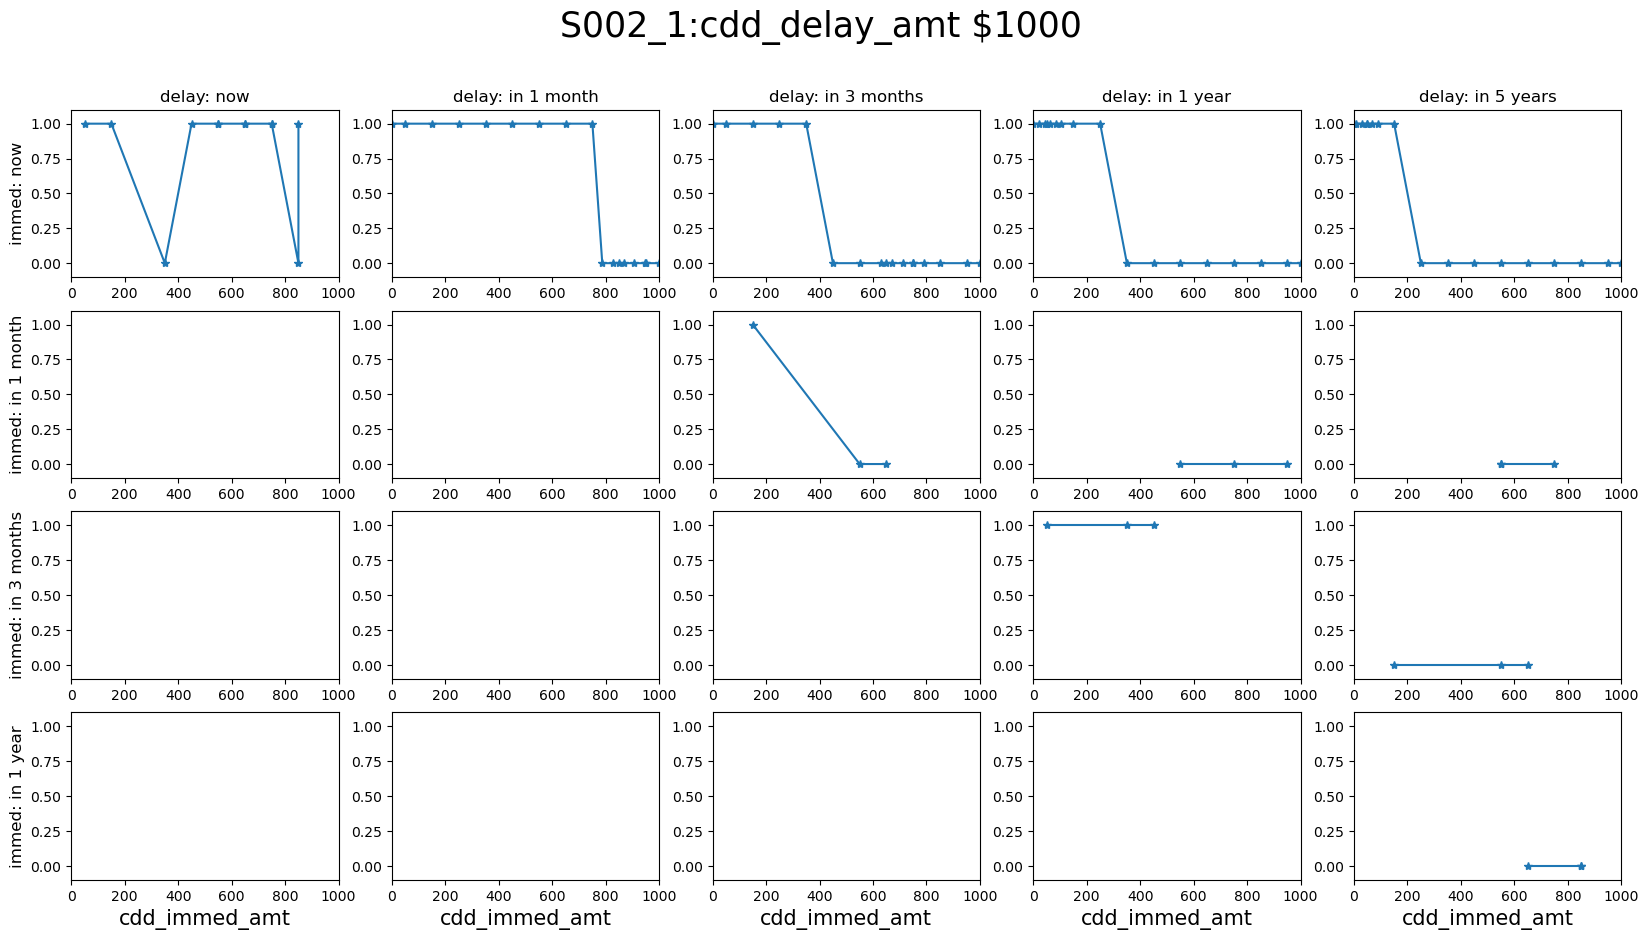

/Volumes/UCDN/datasets/DDT/split/S002_2/cdd/S002_2_cdd.csv
Presync
Saving to: /Volumes/UCDN/datasets/DDT/split/S002_2/cdd/S002_2_cdd_delay_amt_choice.csv
Saving to: /Volumes/UCDN/datasets/DDT/split/S002_2/cdd/S002_2_cdd_plot_delay_amt_choice.png


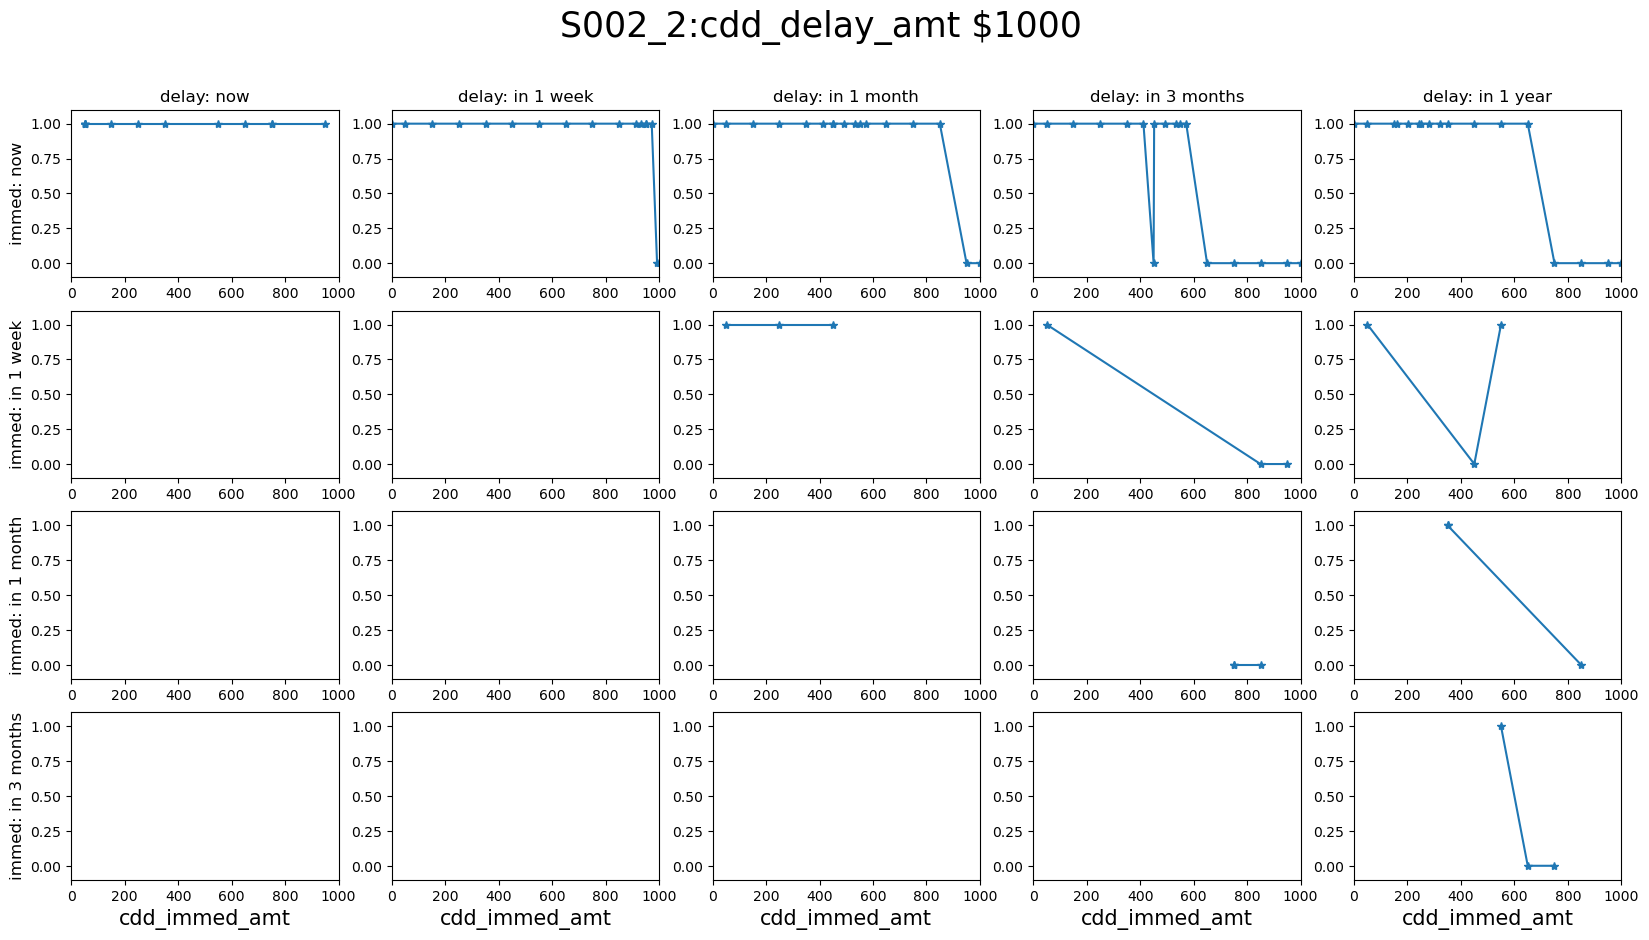

/Volumes/UCDN/datasets/DDT/split/S109_1/cdd/S109_1_cdd.csv
Presync
Saving to: /Volumes/UCDN/datasets/DDT/split/S109_1/cdd/S109_1_cdd_delay_amt_choice.csv
Saving to: /Volumes/UCDN/datasets/DDT/split/S109_1/cdd/S109_1_cdd_plot_delay_amt_choice.png


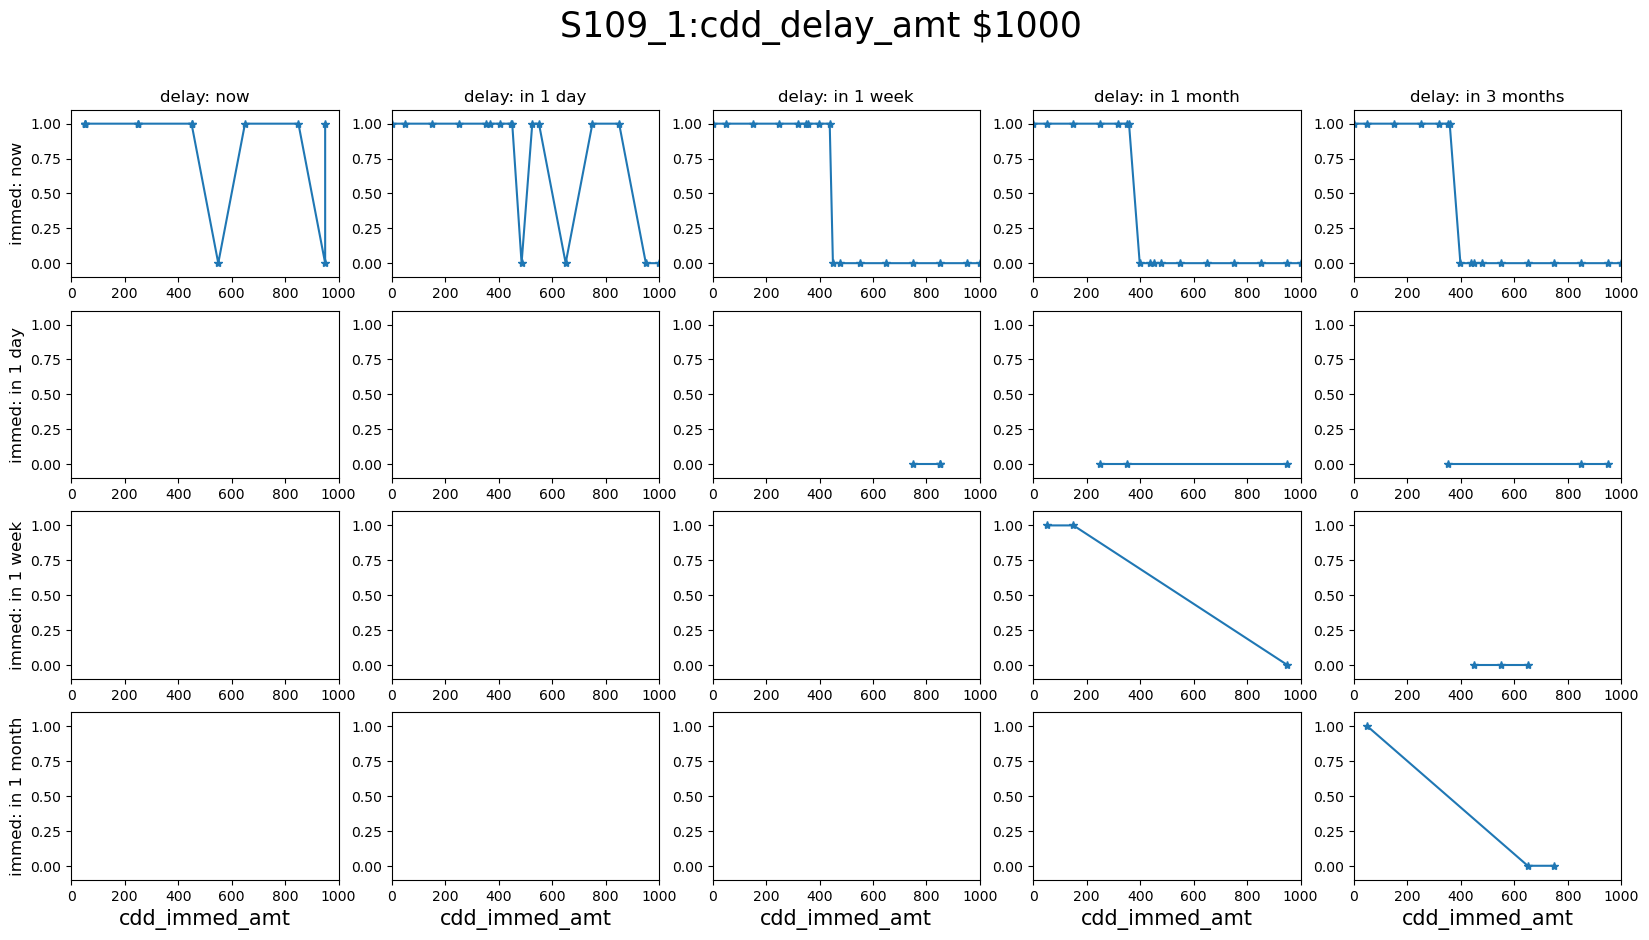

/Volumes/UCDN/datasets/DDT/split/S109_2/cdd/S109_2_cdd.csv
Presync
Saving to: /Volumes/UCDN/datasets/DDT/split/S109_2/cdd/S109_2_cdd_delay_amt_choice.csv
Saving to: /Volumes/UCDN/datasets/DDT/split/S109_2/cdd/S109_2_cdd_plot_delay_amt_choice.png


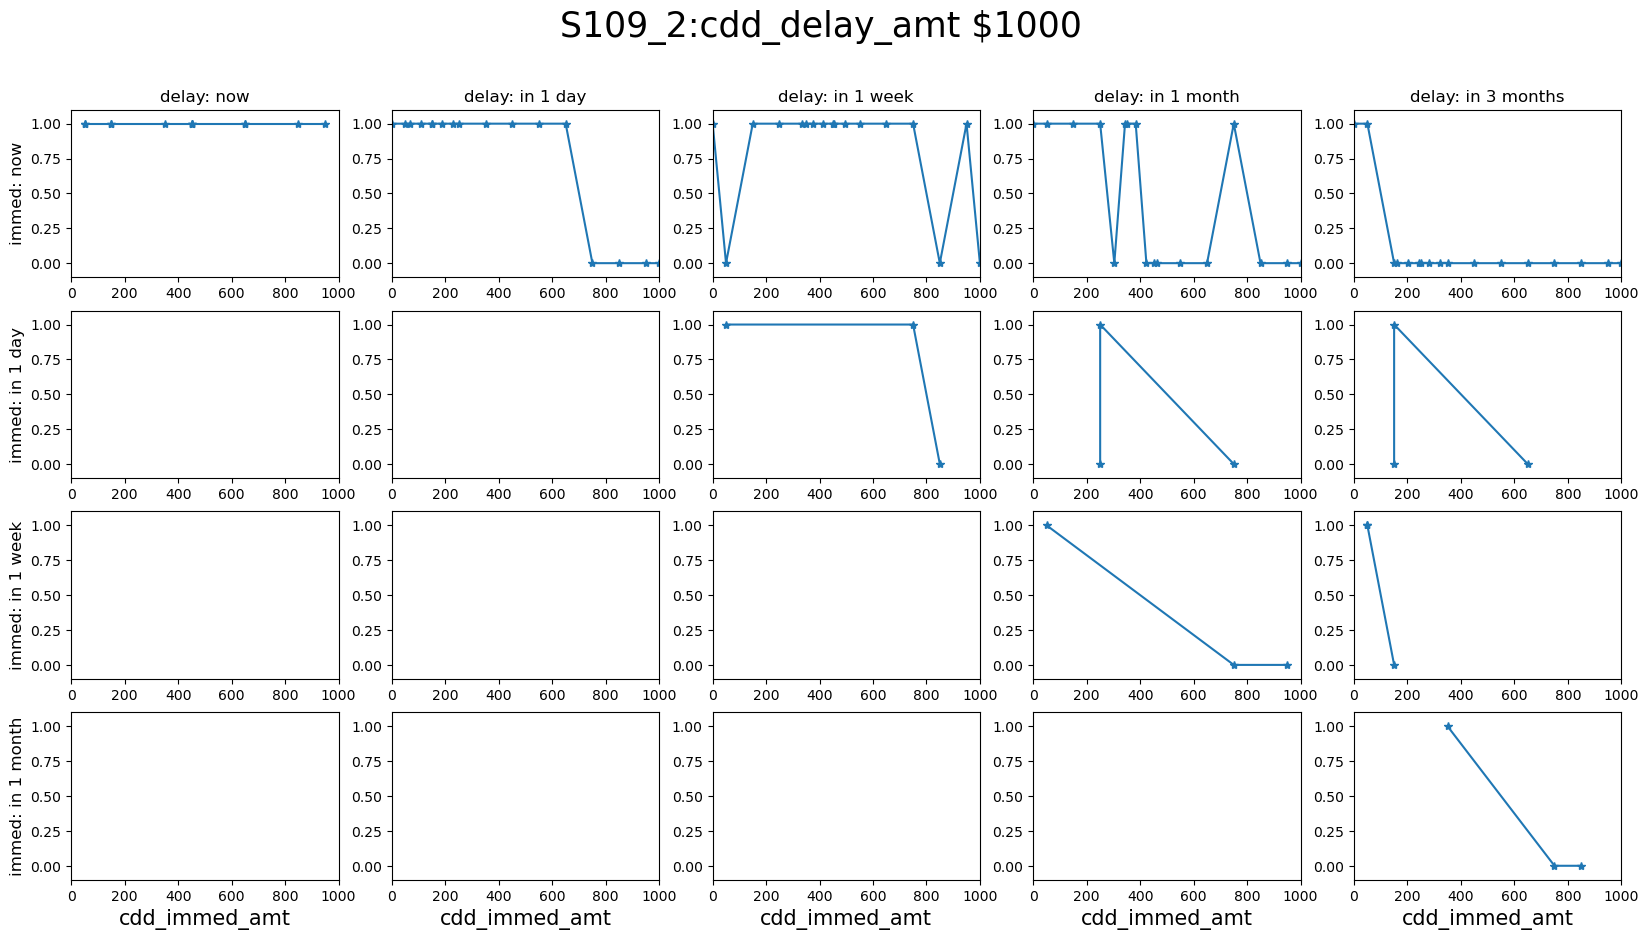

In [47]:
cols = ['cdd_immed_wait','cdd_delay_amt','cdd_delay_wait','cdd_immed_amt']

# delay wait
xcol=cols[2]
# immediate wait
ycol=cols[0]

# ylabels = ['Immediate $2','Immediate $5', 'Immediate $15']
# titles = ['Delay Wait: Now', 'Delay Wait: 1 month','Delay Wait: 3 months','Delay Wait: 12 months','Delay Wait: 60 months']

xax = cols[3]
yax = 'cdd_choice'

# cols defined above
delay_amt_choice_df = pd.DataFrame(columns=['frequency','choice']+cols)

for i, subj_fn in enumerate(good_files):
  print(subj_fn)
  df = pd.read_csv(subj_fn,header=4)
  df = resync_df(df)
  ylabels = get_labels(df,col=ycol)
  xtitle = get_labels(df,col=xcol)
  

  plt.figure(i,figsize=(20,10))
  xcol_vals = sorted(df[xcol].unique())
  ycol_vals = sorted(df[ycol].unique())
  index=0
  #loop through each delay-wait subgroup for each smaller sooner amount 
  for iy, yv in enumerate(ycol_vals):
    for ix, xv in enumerate(xcol_vals):
      # index = 1+iy+(len(xcol_vals)*ix)
      # print('({},{}) with ({},{}) and index: {}'.format(ix,iy,xv,yv,index))
      # print('title:{} ylabel: {}'.format(xtitle[ix],ylabels[iy]))
      index += 1
      plt.subplot(len(ycol_vals),len(xcol_vals),index)
      plt.ylim([-0.1,1.1])
      plt.xlim([0,df['cdd_delay_amt'].max()])
      if (ix == 0):
        plt.ylabel(ylabels[iy],fontsize=12)
      if (iy == 0):
        plt.title(xtitle[ix],fontsize=12)
      if (iy == len(ycol_vals)-1):
        plt.xlabel(xax,fontsize=15)
      
      x = []
      y = []
      #get dataframe with the appropriate smaller sooner and delay-wait time values
      idf = df.loc[(df[xcol] == xv) & (df[ycol] == yv)]
      if not len(idf):
        continue
      x = x + idf[xax].tolist()
      y = y + idf[yax].tolist()
      
      #used to fill .csv file for each participant's choices
      delay_amt_choice, count = count_tuples(list(zip(x,y)))
      this_df = pd.DataFrame(columns=cols)
      this_df["frequency"] = count
      this_df["choice"] = delay_amt_choice
      this_df[xcol] = xtitle[ix]
      this_df[ycol] = ylabels[iy]
      delay_amt_choice_df = pd.concat([delay_amt_choice_df,this_df],ignore_index=True)

      #sort by x and y in order to connect lines properly on final plots
      x,y = zip(*sorted(zip(x,y)))
      plt.plot(x,y,'*-')


  subj = get_subject(subj_fn)

  fn = os.path.join(split_dir,subj,'cdd/{}_cdd_delay_amt_choice.csv'.format(subj))
  print("Saving to: {}".format(fn))
  delay_amt_choice_df.to_csv(fn)
  # print(delay_amt_choice_df)
  
  plt.suptitle('{}: {} ${}'.format(subj,cols[1],df[cols[1]].unique().item()), fontsize=25)
  fig_fn = os.path.join(split_dir,subj,'cdd/{}_cdd_plot_delay_amt_choice.png'.format(subj))
  print("Saving to: {}".format(fig_fn))
  plt.savefig(fig_fn)
  plt.show()
  #sys.exit()